## **Build a two-layer neural network from scratch**

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class SimpleNN:
    # initialize parameters
    def __init__(self, x, y):           
        self.labels = y
        self.features = x.shape[1]
        self.hidden_nodes = 4 # it's a simple network
        self.num_labels = 1 # only produce binary predictions i.e. 0 or 1
        # randomly initialize weights and biases
        self.w1 = np.random.randn(self.features, self.hidden_nodes)
        self.b1 = np.random.randn(self.hidden_nodes)
        self.w2 = np.random.randn(self.hidden_nodes, self.num_labels)
        self.b2 = np.random.randn(self.num_labels)        
    
    # activation and derivative function 
    def sigmoid(self, z, deriv=False):        
        if (deriv==True):
            return z*(1-z)
        return 1 / (1 + np.exp(-z))
    
    def forward_pass(self):
        # input layer
        self.layer0 = x
        # hidden layer
        self.layer1 = self.sigmoid (self.layer0.dot(self.w1) + self.b1) 
        # output layer i.e. predictions
        self.layer2 = self.sigmoid (self.layer1.dot(self.w2) + self.b2) 
    
    def back_prop(self):     
        # prediction error from layer2/output layer
        error2 = self.layer2 - self.labels
        # direction to move towards the correct value (error2 * derivative)
        dw2 = error2*self.sigmoid(self.layer2, deriv=True) 
        # how much did layer1 contribute to the output error i.e. error2
        error1 = dw2.dot(self.w2.T)
        # direction to move towards the correct value (error1 * derivative)
        dw1 = error1*self.sigmoid(self.layer1, deriv=True) 
        # update weights and biases
        self.w2 -= self.layer1.T.dot(dw2)
        self.b2 -= (dw2).sum(axis=0)    
        self.w1 -= self.layer0.T.dot(dw1)
        self.b1 -= (dw1).sum(axis=0)
        
    # log loss
    def loss_fn(self):
        return np.sum(-self.labels * np.log(self.layer2))

In [8]:
x = np.array([    [0,0,1,1],
                  [0,0,0,1],
                  [0,1,0,1],
                  [1,0,1,0],
                  [1,1,1,0],
                  [1,1,1,1]
                ])
y=np.array([[0,0,0,1,1,1]]).T
np.random.seed(1)
# capture losses every 100 epochs
losses = []

In [9]:
simpleNN = SimpleNN(x,y)
for epoch in range(1001):    
    # forward pass
    simpleNN.forward_pass();    
    # backward prop
    simpleNN.back_prop(); 
    if (epoch==0) | ((epoch+1) % 100 == 0):
        loss = simpleNN.loss_fn()
        print('Epoch: {:4} Log loss: {:.3f}'.format(epoch+1, loss))
        losses.append(loss)

Epoch:    1 Log loss: 1.119
Epoch:  100 Log loss: 0.268
Epoch:  200 Log loss: 0.142
Epoch:  300 Log loss: 0.104
Epoch:  400 Log loss: 0.084
Epoch:  500 Log loss: 0.072
Epoch:  600 Log loss: 0.064
Epoch:  700 Log loss: 0.057
Epoch:  800 Log loss: 0.053
Epoch:  900 Log loss: 0.049
Epoch: 1000 Log loss: 0.046


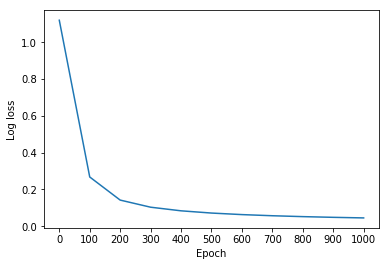

In [10]:
plt.plot(losses)
plt.ylabel('Log loss')
plt.xlabel('Epoch')
plt.xticks(range(0,11), 100*np.linspace(0, 10, num=11, dtype=int))
plt.show()